In [10]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import gamma



In [5]:
def dead_channels(run_number):

    # extract the file
    infile_name = f'TB_FIRE\TB_reco\TB_FIRE_{run_number}_raw_reco_diagnostics.root'
    infile = uproot.open(infile_name)

    # get the Good/Bad channels list
    isgood = infile['Diagnostics;1']['BadChannelResults']['isGood']

    # turn it to ak array
    isgood_arr = ak.Array(isgood.array())

    # divide it to planes:
    isgood_planes = ak.unflatten(isgood_arr, 256)

    # get the index of dead channels in each plane (0 to 255)

    # translate indices to (x,y)



<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
C:\Users\bents\AppData\Local\Temp\ipykernel_12896\4175026528.py:4: SyntaxWarning: invalid escape sequence '\T'
  infile_name = f'TB_FIRE\TB_reco\TB_FIRE_{run_number}_raw_reco_diagnostics.root'


In [12]:
hit_data_1093 = rf.get_ROOT_data_zip_RECO(1093)
# hit_data_1088 = rf.get_ROOT_data_zip_RECO(1088)

1093 RECONSTRUCTED finished


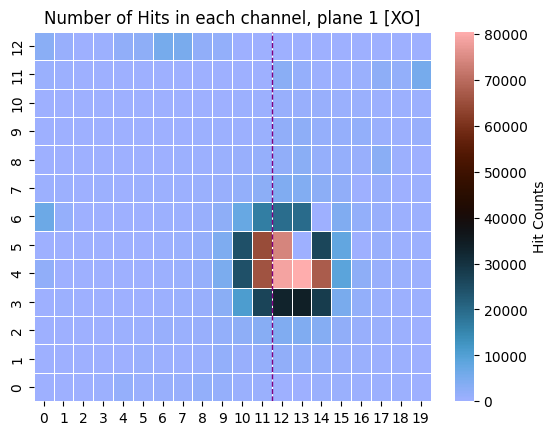

In [4]:
rf.hits_amount_colormap_single_plane(hit_data_1088,1)

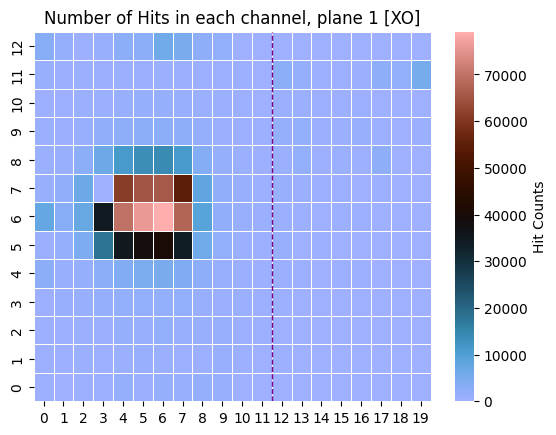

In [ ]:
rf.hits_amount_colormap_single_plane(hit_data_1093,1)

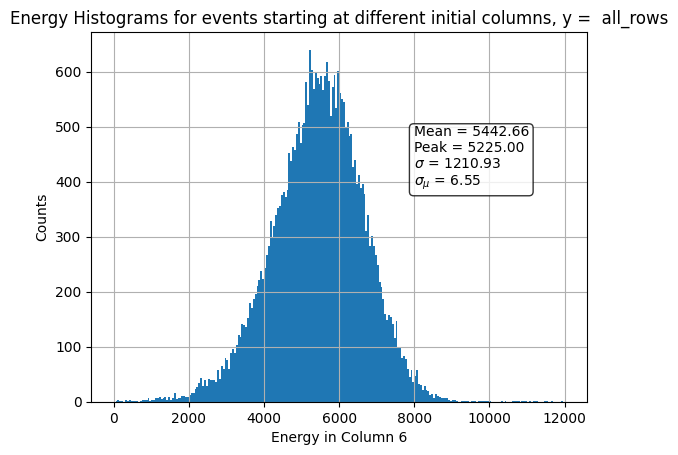

In [3]:
rf.shower_energy_histo_single_location(hit_data_1093, 6, bin_size=50)


In [ ]:
rf.Single_column_energy_histo_Gaussian_fit(hit_data_1093, 6, bin_size=5)

AttributeError: module 'RA_funcs' has no attribute 'Single_column_snergy_histo_Gaussian_fit'

In [13]:
# rf.single_column_energy_Gamma_fit(hit_data_1093, 6, bin_size=5)

In [ ]:

def event_shower_energy_vs_X_position(hit_data, single_pad_only = "true", specific_Y = "false"):
    
    # get only showers starting at the first plane to identify the initial location
    plane_7 = hit_data[hit_data.plane == 7]
    if single_pad_only == "false":
        mask = ak.num(plane_7) > 0

    if single_pad_only == "true":
        mask = ak.num(plane_7) == 1

    first_plane_starting_events = hit_data[mask]

    # determine the initial location of the shower
    # get the data on the first plane
    plane_7_clean = plane_7[mask]
    plane_7_channel = plane_7_clean.ch
    
    # get the x and y positions of each channel
    y, x = divmod(plane_7_channel, 20) #y is the quontinent and is the row, x is the remainder and column
    
    # make x and y one dimensional
    x_list = x.to_list()
    x_ak = ak.Array(x_list)
    x_avg = ak.mean(x_ak, axis = 1)

        
    # compute the shower energy for each event
    hit_amp_array = first_plane_starting_events.amp
    event_shower_amp_array = ak.sum(hit_amp_array, axis = 1)

    # calculate for a specific row if needed
    if specific_Y  != "false":
        y = ak.flatten(y)
        mask_Y = y == specific_Y
        x_avg = x_avg[mask_Y]
        event_shower_amp_array = event_shower_amp_array[mask_Y]

    # get the average shower energy for each X position
    div, avg_amps, classes = rf.ak_groupby(x_avg, event_shower_amp_array)
    
    # get the energies in all column (2d array)
    energies_per_column = div.data
    
    # get the statistics for each column
    means = ak.mean(energies_per_column, axis=1)
    sigmas = ak.std(energies_per_column, axis=1)

    # mean unsertinty
    sem = sigmas / np.sqrt(ak.num(energies_per_column, axis=1))

    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # plot the energy avg per position vs the initial X position of the shower
    # ax1.plot(classes, avg_amps, marker='o')
    ax1.errorbar(
    classes, avg_amps, yerr=sem, fmt='-o',ecolor='black', elinewidth=1, capsize=4, capthick=1, markerfacecolor='blue', markersize=6, label='Data with error')

    ax1.set_xticks(np.arange(0, 20))
    ax1.grid(True, which='both', axis='x', linestyle='--', alpha=0.7)
    ax1.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
    ax1.set_xlabel('X Position at Shower Initiation [Pad Column]')
    ax1.set_ylabel('AVG Shower Energy')
    
    if specific_Y == "false":
        ax1.set_title('Average Shower Energy vs Initial Location')
    
    else:
        ax1.set_title(f'Average Shower Energy vs Initial Location, y = {specific_Y}')

    # show the amounnt of hits in each plane on a bar chart
    bins = np.arange(0, 21, 1) 
    ax2.hist(x_avg, bins=bins, edgecolor='black', rwidth=0.8)
    ax2.set_xticks(np.arange(0, 20) + 0.5)  # shift by 0.5
    ax2.set_xticklabels(np.arange(0, 20)) 
    ax2.grid(True, which='both', axis='x', linestyle='--', alpha=0.7)
    ax2.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
    ax2.set_xlabel('X Position [Pad Column]')
    ax2.set_ylabel('amount of hits')
    ax2.set_title('Amount of Events initiating in Each Column of the Sensor')
    
    plt.show()


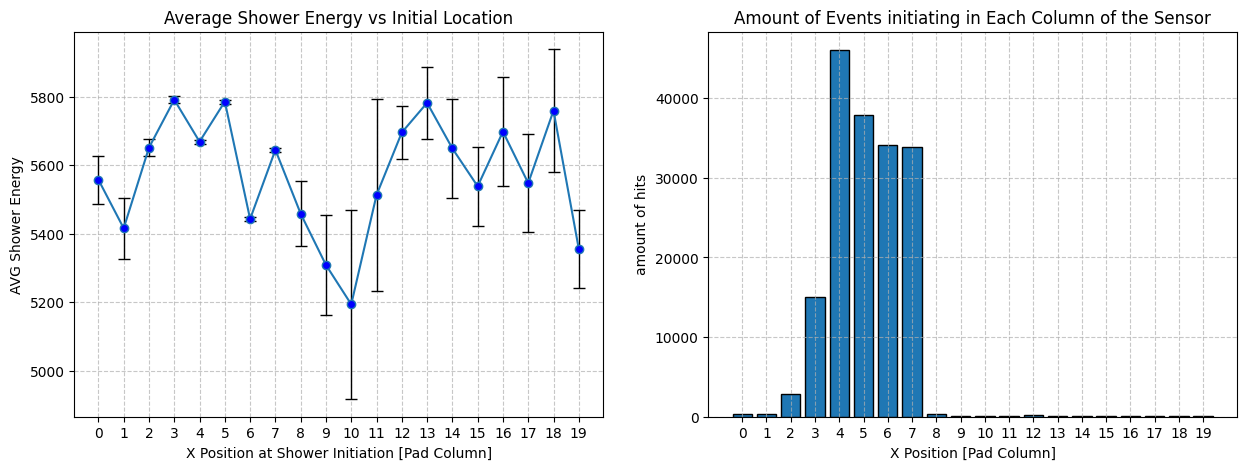

In [4]:
rf.event_shower_energy_vs_X_position(hit_data_1093, single_pad_only = "true")